# K-means Clustering

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. 
The **Elbow Method** is one of the most popular methods to determine this optimal value of k.

## Import Libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Creating Synthetic Data

In [9]:
# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
  

# Visualizing the Data

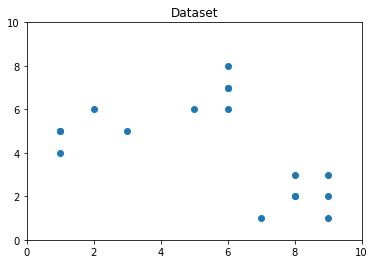

In [10]:
# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

## Elbow Method

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 

**Distortion:** It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

**Inertia:** It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k from 1 to 9 and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

## Using the different values of Distortion

In [4]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [5]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6872918402957646
6 : 0.6178235133263348
7 : 0.5274410771884641
8 : 0.42618267462691206
9 : 0.3333333333333333


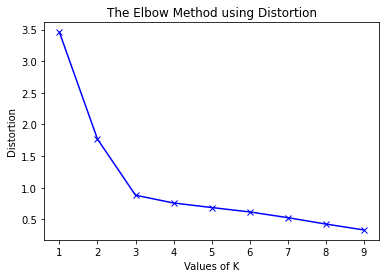

In [6]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

##  Using the different values of Inertia

In [7]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 217.64705882352942
2 : 68.42857142857142
3 : 16.22857142857143
4 : 12.695238095238098
5 : 9.600000000000001
6 : 7.233333333333333
7 : 5.166666666666666
8 : 4.083333333333333
9 : 2.8333333333333335


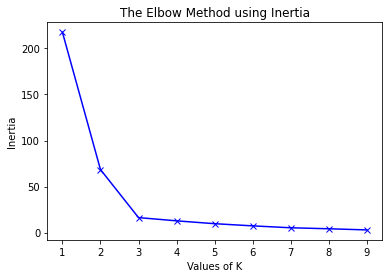

In [8]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Thus for the given data, we conclude that the optimal number of clusters for the data is 3.